In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


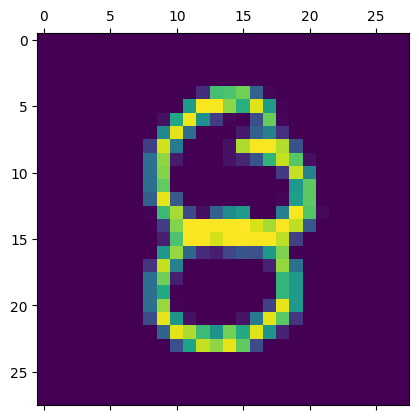

In [5]:
len(x_train)
len(x_test)
x_train[0].shape
plt.matshow(x_train[1170])

In [6]:
# Normalizing the dataset
x_train = x_train/255
x_test = x_test/255

# Flatting the dataset in order
# to compute for model building
x_train_flatten = x_train.reshape(len(x_train), 28*28)
x_test_flatten = x_test.reshape(len(x_test), 28*28)

In [7]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),
                       activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

model.fit(x_train_flatten, y_train, epochs=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8159 - loss: 0.7138
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9143 - loss: 0.3086
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9217 - loss: 0.2836
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9224 - loss: 0.2788
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9269 - loss: 0.2626


In [8]:
model.evaluate(x_test_flatten, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9136 - loss: 0.3030


[0.2662217915058136, 0.925599992275238]

In [12]:
image = x_test[1120]
image = image.astype('float32')/255
image = image.reshape((1, 28*28))
prediction = model.predict(image)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
[[0.4098713  0.61274475 0.5214279  0.429319   0.51780415 0.7139543
  0.47202525 0.6151929  0.26712427 0.4466014 ]]


In [13]:
predicted_class = np.argmax(prediction, axis=1)[0]

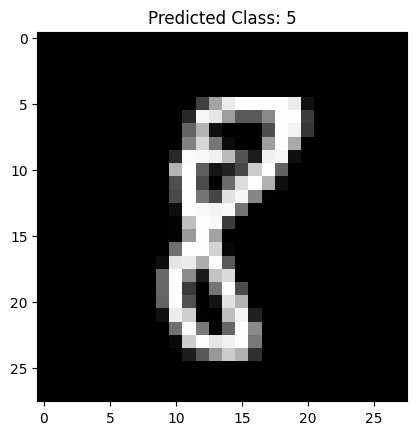

Predicted Class: 5


In [15]:
# Display the image and prediction
plt.imshow(x_test[1120], cmap='gray')
plt.title(f'Predicted Class: {predicted_class}')
plt.show()

print(f'Predicted Class: {predicted_class}')